集群中心的座標： [[2.1 2.1]
 [1.1 1.1]]
預測： [1 1 1 0 0 0]
實際： [1, 1, 1, 0, 0, 0]
預測[1,1],[2.3,2.1]： [1 0]


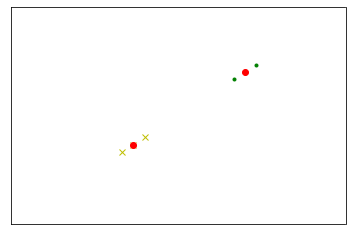

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

X= np.array([[1,1],[1.1,1.1],[1.2,1.2],[2,2],[2.1,2.1],[2.2,2.2]])
Y=[1,1,1,0,0,0]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("集群中心的座標：", kmeans.cluster_centers_)
print("預測：", kmeans.predict(X))
print("實際：",Y)
print("預測[1,1],[2.3,2.1]：", kmeans.predict([[1,1],[2.3,2.1]]))

plt.axis([0,3,0,3])
plt.plot(X[:3,0], X[:3,1], 'yx')
plt.plot(X[3:,0], X[3:,1], 'g.')
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ro')
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

iris = datasets.load_iris()

iris_X_train, iris_X_test, iris_Y_train, iris_Y_test = train_test_split(iris.data, iris.target, test_size=0.2)

kmeans = KMeans(n_clusters=2)
kmeans_fit = kmeans.fit(iris_X_train)

print("實際：", iris_Y_train)
print("預測：", kmeans_fit.labels_)

iris_Y_train[iris_Y_train==1]=11
iris_Y_train[iris_Y_train==0]=1
iris_Y_train[iris_Y_train==11]=0
print("調整：", iris_Y_train)

score = metrics.accuracy_score(iris_Y_train, kmeans.predict(iris_X_train))
print("準確率：{0:f}".format(score))

實際： [2 0 1 0 1 1 0 2 1 2 1 0 0 0 0 2 1 2 2 1 2 0 2 0 2 0 2 1 0 2 1 0 0 1 0 2 2
 2 0 1 1 0 1 1 2 1 2 2 0 0 1 1 2 2 0 0 0 2 2 2 1 1 0 2 1 2 1 1 0 0 2 2 2 0
 0 0 0 0 2 1 0 1 0 1 1 2 2 1 0 0 1 2 1 0 0 2 2 0 0 1 1 0 0 0 1 1 1 0 0 0 2
 2 0 1 1 2 1 2 2 2]
預測： [0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0
 0 1 0 0 0 0 0 0 0]
調整： [2 1 0 1 0 0 1 2 0 2 0 1 1 1 1 2 0 2 2 0 2 1 2 1 2 1 2 0 1 2 0 1 1 0 1 2 2
 2 1 0 0 1 0 0 2 0 2 2 1 1 0 0 2 2 1 1 1 2 2 2 0 0 1 2 0 2 0 0 1 1 2 2 2 1
 1 1 1 1 2 0 1 0 1 0 0 2 2 0 1 1 0 2 0 1 1 2 2 1 1 0 0 1 1 1 0 0 0 1 1 1 2
 2 1 0 0 2 0 2 2 2]
準確率：0.650000


<function matplotlib.pyplot.show>

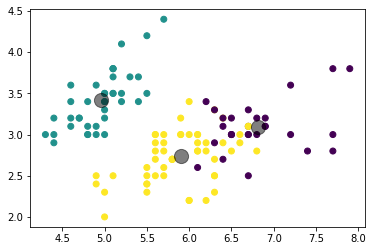

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

iris = datasets.load_iris()

iris_X_train, iris_X_test, iris_Y_train, iris_Y_test = train_test_split(iris.data, iris.target, test_size=0.2)

kmeans = KMeans(n_clusters=3)
kmeans.fit(iris_X_train)
Y_predict=kmeans.predict(iris_X_train)

x1=iris_X_train[:,0]
y1=iris_X_train[:,1]
plt.scatter(x1,y1,c=Y_predict,cmap='viridis')

centers=kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);
plt.show

# 神經網路模型的Iris

### 與分群的比較
神經網路包含三層神經元，除了輸入和輸出層外，中間有一層隱藏層（不參與輸入或輸出，隱藏於內部；可能含一層以上），傳遞並處理資料。

而分群則是在 N 筆資料中，可將資料分為 K 群。透過反覆的閱讀資料點，更新對應的群中心。每個資料點會被分配到與它最相近的群裡。



### 程式碼
出處：https://github.com/EdoVaira/Iris-Neural-Network

由於是使用Tensorflow 1.x版，需先執行下方程式碼，將版本切換為1.x後restart the runtime才能執行。

In [3]:
%tensorflow_version 1.x_
exit()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x_`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [4]:
# Dependencies
import tensorflow as tf
import pandas as pd
import numpy as np

# Make results reproducible
seed = 1234
np.random.seed(seed)
tf.set_random_seed(seed)

# Loading the dataset
dataset = pd.read_csv('Iris_Dataset.csv')
dataset = pd.get_dummies(dataset, columns=['Species']) # One Hot Encoding
values = list(dataset.columns.values)

y = dataset[values[-3:]]
y = np.array(y, dtype='float32')
X = dataset[values[1:-3]]
X = np.array(X, dtype='float32')

# Shuffle Data
indices = np.random.choice(len(X), len(X), replace=False)
X_values = X[indices]
y_values = y[indices]

# Creating a Train and a Test Dataset
test_size = 10
X_test = X_values[-test_size:]
X_train = X_values[:-test_size]
y_test = y_values[-test_size:]
y_train = y_values[:-test_size]

# Session
sess = tf.Session()

# Interval / Epochs
interval = 50
epoch = 500

# Initialize placeholders
X_data = tf.placeholder(shape=[None, 4], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 3], dtype=tf.float32)

# Input neurons : 4
# Hidden neurons : 8
# Output neurons : 3
hidden_layer_nodes = 8

# Create variables for Neural Network layers
w1 = tf.Variable(tf.random_normal(shape=[4,hidden_layer_nodes])) # Inputs -> Hidden Layer
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # First Bias
w2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,3])) # Hidden layer -> Outputs
b2 = tf.Variable(tf.random_normal(shape=[3]))   # Second Bias

# Operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(X_data, w1), b1))
final_output = tf.nn.softmax(tf.add(tf.matmul(hidden_output, w2), b2))

# Cost Function
loss = tf.reduce_mean(-tf.reduce_sum(y_target * tf.log(final_output), axis=0))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training
print('Training the model...')
for i in range(1, (epoch + 1)):
    sess.run(optimizer, feed_dict={X_data: X_train, y_target: y_train})
    if i % interval == 0:
        print('Epoch', i, '|', 'Loss:', sess.run(loss, feed_dict={X_data: X_train, y_target: y_train}))

# Prediction
print()
for i in range(len(X_test)):
    print('Actual:', y_test[i], 'Predicted:', np.rint(sess.run(final_output, feed_dict={X_data: [X_test[i]]})))

Training the model...
Epoch 50 | Loss: 11.746563
Epoch 100 | Loss: 7.7785707
Epoch 150 | Loss: 6.7392106
Epoch 200 | Loss: 6.0584755
Epoch 250 | Loss: 5.5722713
Epoch 300 | Loss: 5.2039094
Epoch 350 | Loss: 4.9128094
Epoch 400 | Loss: 4.675448
Epoch 450 | Loss: 4.47719
Epoch 500 | Loss: 4.3084755

Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 0. 1.] Predicted: [[0. 0. 1.]]
Actual: [0. 1. 0.] Predicted: [[0. 1. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
Actual: [1. 0. 0.] Predicted: [[1. 0. 0.]]
